In [1]:
%matplotlib inline

##### MNIST template

## Tarea 5

Escuela de Ingeniería Electrónica<br>
EL5857 Aprendizaje Automático<br>
I Semestre 2023

Este archivo permite cargar el set de datos MNIST para ser usado con scikit-learn.

Puede usarlo como base para entrenar sus modelos, y para la selección de modelos.  Debe guardar sus modelos en un archivo para utilizar los mejores de ellos en ``predict_digit.ipynb``, sin necesidad de entrenar todo de nuevo cuando solo se quiera predecir.

MNIST es un set de datos bastante utilizado, y existen múltiples posibilidades de cargarlo en programas de Python.

- Usando ``fetch_openml`` de ``sckit-learn`` es una opción pero tiene en algunas versiones el problema de que baja todo el conjunto de internet cada vez que se ejecuta el programa, lo que no lo hace viable.
- Usando el paquete ``python-mnist``, que no existe en las distribuciones de conda.
- Usando el paquete ``mnist``.
- Usando ``pandas``.

Aquí usaremos la versión que usa el paquete ``mnist``, para evitar dependencias adicionales a bibliotecas grandes.

Dicho paquete carga los datos como un tensor de 60000x28x28, es decir, 60000 imágenes de 28x28 dimensiones.  Cada pixel es de tipo entero sin signo de 8 bits.

In [2]:
# Si le falta la biblioteca 'mnist' y usa Anaconda:
#!conda install mnist

# o cualquier otra distribución de Python:
#!pip install mnist

In [3]:
import mnist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

try:
    from sklearnex import patch_sklearn
    patch_sklearn()
except:
    print("No scikit-learn-intelex found.  We go on with the classic implementation.")

import time
from pathlib import Path

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
tic=time.time()

# Asegure que el directorio de datos existe.
datadir='./mnist_data/'
Path(datadir).mkdir(parents=False, exist_ok=True)

# temporary_dir es una función que retorna el directorio temporal;
mnist.temporary_dir = lambda: datadir

# Prepare el codificador 'one-hot'
enc = OneHotEncoder(handle_unknown='ignore')

# La primera vez, esto puede tardar unos segundos a minutos por tener
# que bajar los datos originales de internet.
# Después de eso debería ser rápido.

# Prepare los datos de entrenamiento
train_images = mnist.train_images() # Esto es un tensor m x 28 x 28
train_labels = mnist.train_labels().astype(int)
train_ohelab = enc.fit_transform(train_labels.reshape(-1,1)).toarray() # labels one-hot encoded

m,h,w=train_images.shape
train_data = train_images.reshape((m,w*h)).astype(float)/255 # Esto es una matrix de m x 784

# Prepare los datos de validación
val_images = mnist.test_images() # Esto es un tensor de m x 28 x 28
val_labels = mnist.test_labels().astype(int)
val_ohelab = enc.transform(val_labels.reshape(-1,1)).toarray()

vm,vh,vw=val_images.shape
val_data = val_images.reshape((vm,vw*vh)).astype(float)/255 # Esto es una matrix de m x 784


toc=time.time()-tic
print("Tardó: {0} s".format(toc))

print("Entrenamiento: {0} datos de {1}x{2} dimensiones".format(m,h,w))
print("Validación   : {0} datos de {1}x{2} dimensiones".format(vm,vh,vw))

Tardó: 0.7799975872039795 s
Entrenamiento: 60000 datos de 28x28 dimensiones
Validación   : 10000 datos de 28x28 dimensiones


A este punto, se cuenta con la siguiente información para poder entrenar:

- train_data: arreglo de 60000 datos de 784 dimensiones
- train_label: vector de 60000 etiquetas como enteros entre 0 y 9
- train_ohelab: arreglo de 60000x10 con la codificación de las etiquetas _one-hot_
- val_data: arreglo de 10000 datos de 784 dimensiones
- val_label: vector de 10000 etiquetas como enteros entre 0 y 9
- val_ohelab: arreglo de 10000x10 con la codificación de las etiquetas _one-hot_


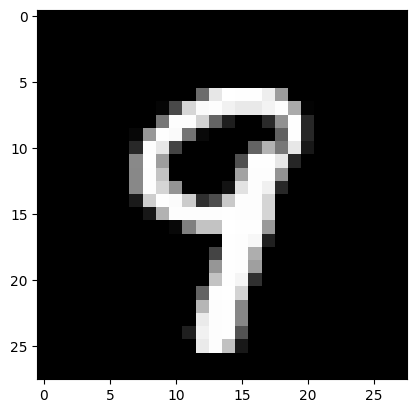

Etiqueta entera: 9
         one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


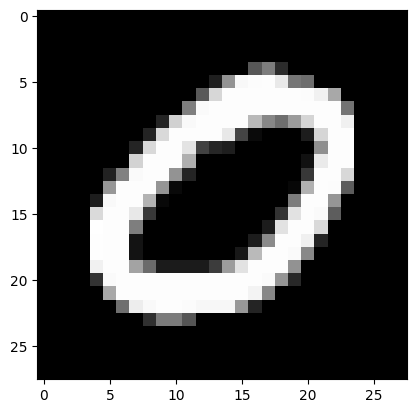

Etiqueta entera: 0
         one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


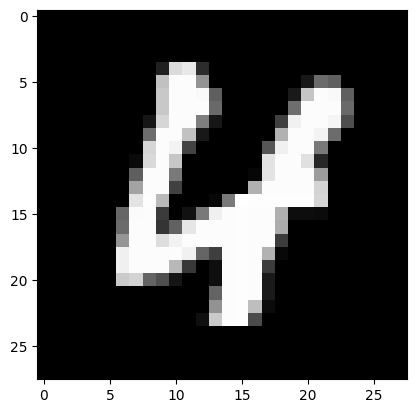

Etiqueta entera: 4
         one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


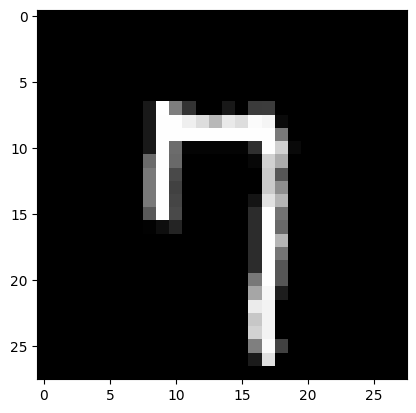

Etiqueta entera: 7
         one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [5]:
# Muestre algunas muestras
samples = np.random.choice(np.arange(m),4,replace=False)

for i in samples:
    plt.imshow(train_data[i].reshape((28,28)),cmap='gray')
    plt.show()

    print("Etiqueta entera:",train_labels[i])
    print("         one-hot:",train_ohelab[i])


## Entrenar/seleccionar modelos

A continuación usted debe entrenar y seleccionar los modelos, y guardar el mejor de ellos para cada tipo (SVM, RDF, kNN)

No olvidar la regla de oro: **¡siempre se deben normalizar los datos!**